In [2]:
import torch
from transformers import CLIPProcessor
from utils import evaluate_metrics, plot_roc_curve, compute_video_level_accuracy_from_dir, get_misclassified_neuraltextures_samples_from_file, visualize_misclassified_samples, analyze_misclassified_with_prompts, load_prediction_results, load_lora_adapter

c:\Users\wei\Desktop\programs\cross_manipulation_deepfake_detection_with_vlm\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
data_root = "./data"
model_name = "openai/clip-vit-base-patch32"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

### Clip Linear Baseline

In [11]:
results_path = "results/baseline_clip_linear"

AUC: 0.603, F1: 0.899, Accuracy: 0.818, EER: 0.441


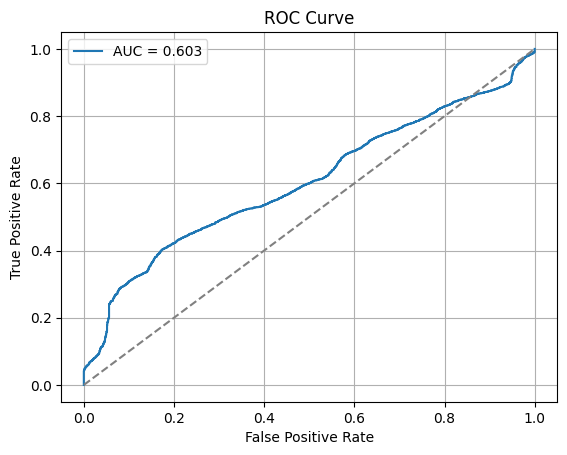

In [12]:
paths, scores, labels, preds = load_prediction_results(results_path)
metrics = evaluate_metrics(scores, preds, labels)
print(f"AUC: {metrics['AUC']:.3f}, F1: {metrics['F1']:.3f}, Accuracy: {metrics['Accuracy']:.3f}, EER: {metrics['EER']:.3f}")
plot_roc_curve(metrics['FPR'], metrics['TPR'], metrics['AUC'])

In [13]:
threshold = 0.5
video_level_acc = compute_video_level_accuracy_from_dir(results_path, threshold)
print(f"threshold: {threshold}\nvideo level accuracy: {video_level_acc:.3f}")

threshold: 0.5
video level accuracy: 0.817


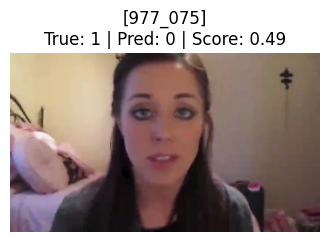

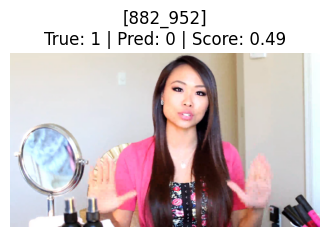

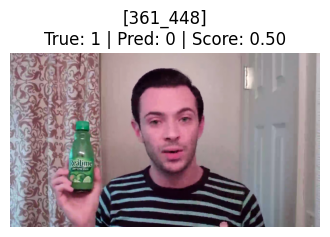

In [14]:
samples = get_misclassified_neuraltextures_samples_from_file(results_path)
visualize_misclassified_samples(samples)

### Prompt = "AI-Generated", "Authentic"

In [29]:
results_path = "results/AI-Generated_vs_Authentic"
save_dir = "lora_checkpoints/AI-Generated_vs_Authentic"
prompts = ["AI-Generated", "Authentic"]

AUC: 0.792, F1: 0.927, Accuracy: 0.872, EER: 0.269


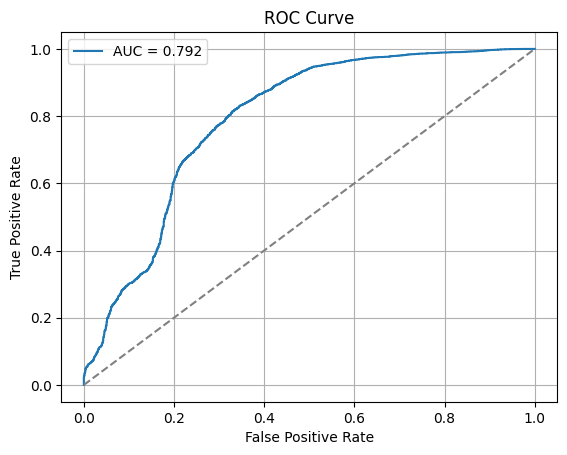

In [30]:
paths, scores, labels, preds = load_prediction_results(results_path)
metrics = evaluate_metrics(scores, preds, labels)
print(f"AUC: {metrics['AUC']:.3f}, F1: {metrics['F1']:.3f}, Accuracy: {metrics['Accuracy']:.3f}, EER: {metrics['EER']:.3f}")
plot_roc_curve(metrics['FPR'], metrics['TPR'], metrics['AUC'])

In [31]:
threshold = 0.5
video_level_acc = compute_video_level_accuracy_from_dir(results_path, threshold)
print(f"threshold: {threshold}\nvideo level accuracy: {video_level_acc:.3f}")

threshold: 0.5
video level accuracy: 0.875


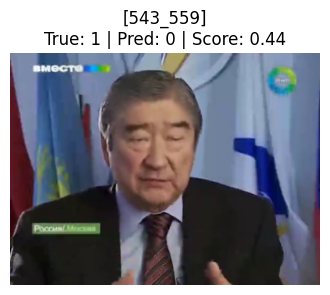

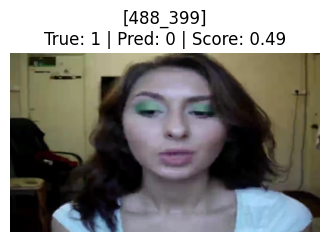

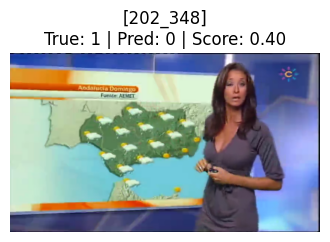

In [32]:
samples = get_misclassified_neuraltextures_samples_from_file(results_path)
visualize_misclassified_samples(samples)

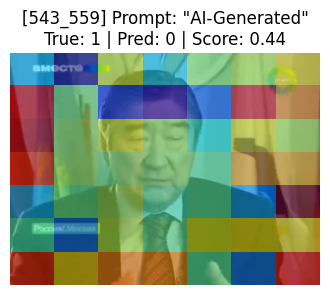

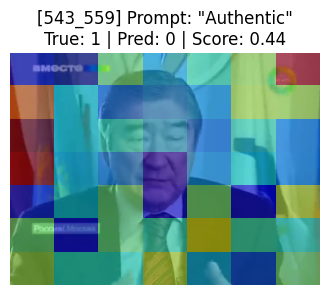

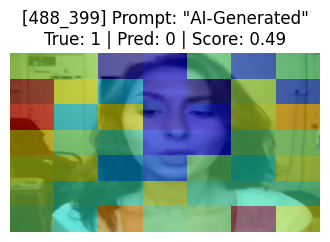

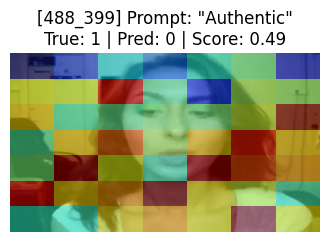

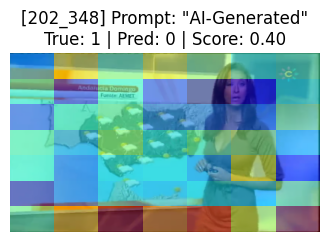

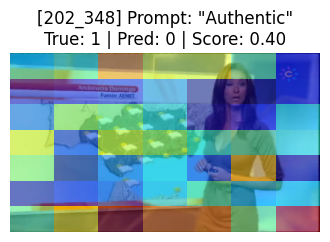

In [33]:
processor = CLIPProcessor.from_pretrained(model_name)
clip = load_lora_adapter(model_name, save_dir)
clip.to(device)
 
analyze_misclassified_with_prompts(samples, clip, processor, prompts, root_dir=data_root)

### Prompt = "AI-Generated face", "Authentic face"

In [4]:
results_path = "results/AI-Generated_face_vs_Authentic_face"
save_dir = "lora_checkpoints/AI-Generated_face_vs_Authentic_face"
prompts = ["AI-Generated face", "Authentic face"]

AUC: 0.859, F1: 0.924, Accuracy: 0.869, EER: 0.191


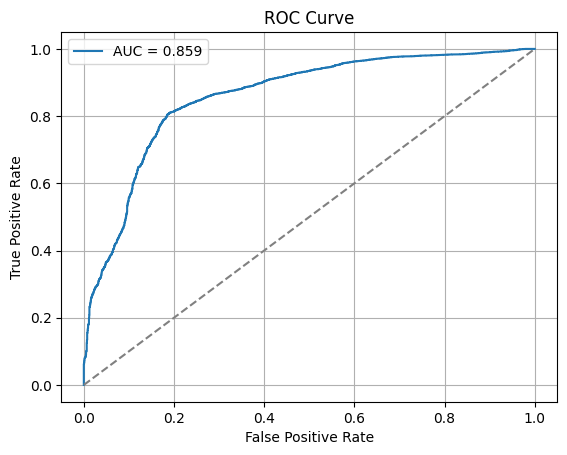

In [35]:
paths, scores, labels, preds = load_prediction_results(results_path)
metrics = evaluate_metrics(scores, preds, labels)
print(f"AUC: {metrics['AUC']:.3f}, F1: {metrics['F1']:.3f}, Accuracy: {metrics['Accuracy']:.3f}, EER: {metrics['EER']:.3f}")
plot_roc_curve(metrics['FPR'], metrics['TPR'], metrics['AUC'])

In [5]:
threshold = 0.5
video_level_acc = compute_video_level_accuracy_from_dir(results_path, threshold)
print(f"threshold: {threshold}\nvideo level accuracy: {video_level_acc:.3f}")

threshold: 0.5
video level accuracy: 0.875


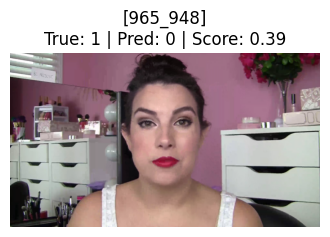

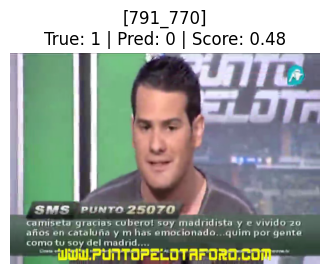

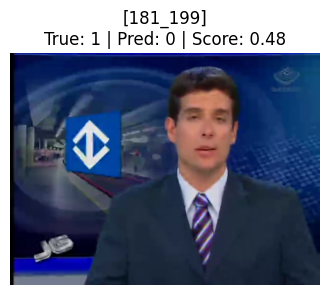

In [37]:
samples = get_misclassified_neuraltextures_samples_from_file(results_path)
visualize_misclassified_samples(samples)

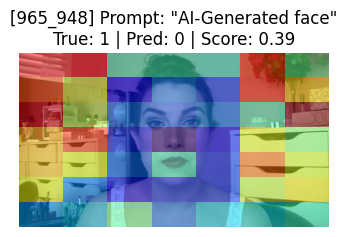

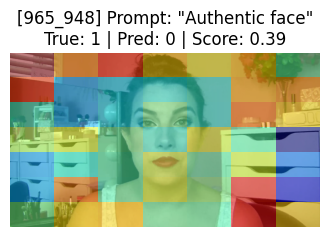

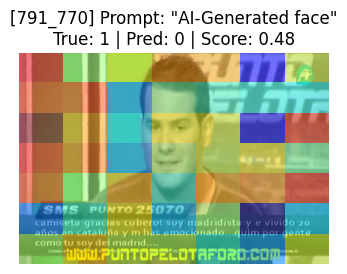

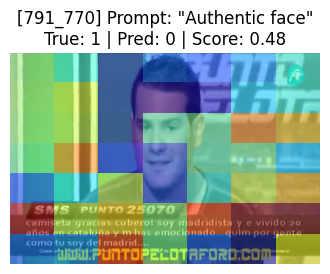

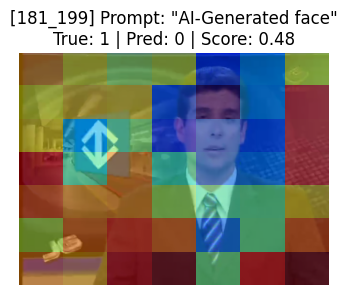

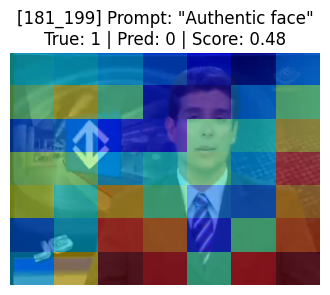

In [38]:
processor = CLIPProcessor.from_pretrained(model_name)
clip = load_lora_adapter(model_name, save_dir)
clip.to(device)
 
analyze_misclassified_with_prompts(samples, clip, processor, prompts, root_dir=data_root)